In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [525]:
df_raw = pd.read_csv('indian_liver_patient.csv')
df_raw.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [526]:
pd.Series(df_raw.columns)

0                            Age
1                         Gender
2                Total_Bilirubin
3               Direct_Bilirubin
4           Alkaline_Phosphotase
5       Alamine_Aminotransferase
6     Aspartate_Aminotransferase
7                 Total_Protiens
8                        Albumin
9     Albumin_and_Globulin_Ratio
10                       Dataset
dtype: object

## Checking if any columns have NaN values

In [527]:
def get_null_rows(df):
    list_df_new = []
    list_na_cols = []
    for column in df.columns.tolist():
        if(df[column].isna().any()):
            list_na_cols.append({
                'column': column,
                'indices': df.index[df[column].isna()].tolist()
            })
    if(len(list_na_cols) == 0):
        list_df_new = []
        return(['No null values in any rows.'])
    else:
        list_df_new = []
        list_new = []
        for i in range(0, len(list_na_cols)):
            for j in range(0, len(list_na_cols[i]['indices'])):
                list_new.append(df.iloc[list_na_cols[i]['indices'][j]])
            list_df_new.append(pd.DataFrame(list_new, columns=df.columns))
        return([list_na_cols, list_df_new])

def display_null_rows(df):
    list_null_df = get_null_rows(df)
    if(len(list_null_df) == 2):
        for i in range(0, len(list_null_df[0])):
            print(list_null_df[0][i]['column'])
            display(list_null_df[1][i])
    else:
        print(list_null_df[0])

In [528]:
display_null_rows(df_raw)

Albumin_and_Globulin_Ratio


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [529]:
df_no_na = df_raw
df_no_na = df_no_na.fillna(df_no_na.mean())
display_null_rows(df_no_na)

No null values in any rows.


## Encoding independent Gender variable

In [530]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ct = ColumnTransformer(
    transformers=[
        (
            'encoder',
            encoder,
            [1]
        )
    ],
    remainder='passthrough'
)
X = np.array(
        ct.fit_transform(
        np.array(
            df_no_na.iloc[:, :10].values
        )
    )
)
ct.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'x0',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9']

In [531]:
# Dependent variables
y = df_no_na.iloc[:, -1].values

## Splitting the dataset into training and test

In [532]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Training the model

In [533]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting results and checking accuracy

In [534]:
accuracy = classifier.score(X_test, y_test)
print(accuracy*100, '%')

74.35897435897436 %


## **An accuracy of 75% is not ideal. Now let us try reducing the dimensions.**

## Feature scaling

In [535]:
print(X_train[:, 2])

[46 64 53 22 38 68 12 23 45 32 31 42 70 40 66 42 72 60 45 40 29 32 75 70
 53 30 56 42 28 66 35 53 60 30 43 37 49 47 54 25 60 33 72 38 26 49 65 40
 17 32 55 52 66 73 35 70 58 55 49 24 74 54 45 42 28 30 45 26 33 72 18 66
 43 51 68 42 61 60 37 32 55 27 36 63 32 55 36 40 60 75 32 42 53 46 50 52
 55 58 21 34 46 60 8 36 29 51 32 26 46 54 50 33 38 60 60 50 15 36 49 21 47
 56 18 38 38 65 37 75 32 42 58 45 42 40 39 74 62 58 48 40 50 22 16 19 22
 18 18 46 65 35 64 62 55 34 60 52 11 44 35 60 55 60 27 60 43 64 65 38 24
 35 65 41 30 29 61 42 48 70 70 31 48 60 37 64 18 34 65 27 4 18 21 50 21 36
 58 32 38 45 61 52 55 46 22 56 58 39 47 21 40 60 16 60 65 37 26 55 35 62
 31 35 41 42 65 31 50 52 46 21 58 66 65 27 45 45 38 68 50 31 34 33 26 72 4
 85 32 74 70 42 36 30 60 58 45 32 17 57 18 36 46 26 47 20 43 45 42 32 50
 46 51 32 33 22 38 30 26 57 46 54 36 48 17 40 40 70 35 50 56 75 37 32 74
 51 40 90 42 48 7 18 63 27 64 45 18 24 48 22 66 52 51 41 61 31 49 33 35 40
 7 64 75 75 39 50 78 45 29 32 20 72 50 72 1

In [536]:
X_train[0][3]

1.8

In [537]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 2:] = sc.fit_transform(X_train[:, 2:])
print(X_train[:, 2:])

[[0.06316811709351126 -0.23378031010322464 -0.26885595461233913 ...
  1.029788547267931 1.5786083772838504 1.0553237976946908]
 [1.1693354786391743 -0.34120267544436 -0.3380370009123663 ...
  -0.9093129966158408 0.05477305089487888 1.3334300590662564]
 [0.49334431325015804 -0.3718947798275416 -0.4418085703624072 ...
  1.3991412222934116 0.9436769912884452 -0.180704030623382]
 ...
 [1.8453266440281908 -0.3872408320191323 -0.4418085703624072 ...
  -1.9250328529359115 -1.4690622754940927 -0.4897109877029001]
 [0.9235205094068049 -0.279818466677997 -0.30344647776235273 ...
  -1.8326946841795417 -1.4690622754940927 -0.4897109877029001]
 [0.06316811709351126 1.6691301616540308 2.187071189038628 ...
  -2.017371021692282 -1.4690622754940927 -0.4897109877029001]]


In [538]:
# sc.transform([[1.8]])

# Reduce dimensions via Principal Component Analysis

In [539]:
from sklearn import decomposition
pca_all = decomposition.PCA()
pca_coord = pca_all.fit_transform(X_train)

In [540]:
pca_coord.shape

(466, 11)

In [541]:
pca.components_

array([[-2.93183166e-02,  2.93183166e-02,  8.80043848e-02,
         4.21153134e-01,  4.29061852e-01,  2.33828360e-01,
         3.08386317e-01,  3.48768055e-01, -2.67147075e-01,
        -4.18231183e-01, -3.33721747e-01],
       [-6.19091296e-03,  6.19091296e-03, -3.12412237e-01,
         1.98039369e-01,  2.09060641e-01, -2.22531336e-02,
         4.15496547e-01,  4.04972799e-01,  4.03526738e-01,
         4.48629993e-01,  3.43740814e-01],
       [-4.83562497e-03,  4.83562497e-03, -2.91921216e-02,
        -4.71407752e-01, -4.58122009e-01, -1.48466999e-01,
         4.69564263e-01,  4.25155901e-01, -3.50197205e-01,
        -1.39818611e-01,  3.90140517e-02],
       [ 4.32935074e-02, -4.32935074e-02,  3.59572244e-01,
        -2.16523995e-01, -1.91961726e-01,  7.74214205e-01,
         1.06972141e-01,  6.89139193e-02,  3.21981595e-01,
         1.68576006e-01, -1.88513612e-01],
       [ 4.83112229e-02, -4.83112229e-02, -8.71755003e-01,
        -9.79954543e-02, -8.49665503e-02,  3.78728144e-01,
  

In [542]:
pca_all.explained_variance_ratio_

array([2.89966179e-01, 2.22843178e-01, 1.48937994e-01, 1.02373499e-01,
       9.09363054e-02, 7.32115924e-02, 3.83274888e-02, 1.49239983e-02,
       1.17287146e-02, 6.75105010e-03, 2.98967645e-32])

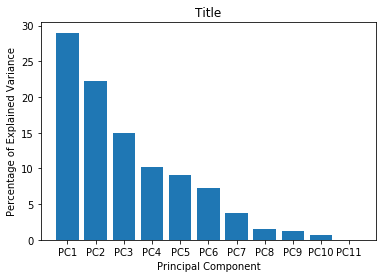

In [543]:
per_var = np.round(pca_all.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Title')
plt.show()

In [544]:
df_pca = pd.DataFrame(pca_coord, columns=labels)

## Now, let us use only the first two components to see if we can separate the categories

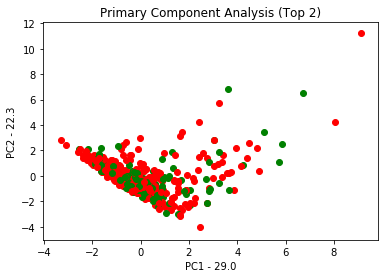

In [545]:
plt.title('Primary Component Analysis (Top 2)')
plt.xlabel('PC1 - {}'.format(per_var[0]))
plt.ylabel('PC2 - {}'.format(per_var[1]))

y_distinct = [1, 2]
colors = ['r', 'g']
for index in range(0, len(X_train)):
    for i in range(0, len(y_distinct)):
        if(y[index] == y_distinct[i]):
            color = colors[i]
    plt.scatter(df_pca['PC1'][index], df_pca['PC2'][index], c=color)
# plt.legend(y_distinct)
plt.show()

## We could not separate the two categories based on the first two primary components.

## Now let us train models for every number of components

In [546]:
df_pca.iloc[:, :3]

,PC1,PC2,PC3
0,-1.803986,1.069469,-0.589285
1,-0.759710,-0.655404,0.423697
2,-1.316985,0.372270,-0.476315
3,-1.216915,0.944614,-0.329065
4,-0.128891,-0.901130,0.448369
...,...,...,...
461,0.855932,-1.281311,0.478437
462,0.142445,-0.483241,0.310088
463,0.763279,-2.617823,0.945385
464,1.787100,-1.219525,1.859770


In [547]:
df_pca.iloc[:, :2].values.shape

(466, 2)

Precision = TP/(TP + FP) * 100 <br>
Recall = TP/(TP + FN) * 100 <br>
FN_perc = FN/total * 100 <br>
F1_score =  (Precision * Recall) / (Precision + Recall) * 2


In [555]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X_test[:, 2:] = sc.fit_transform(X_test[:, 2:])
print_output = []
print_output_columns = [
    'number_of_components', 
    'f1_score_total',
    'f1_score_1',
    'f1_score_2',
    'accuracy',
    'precision_total',
    'recall_total', 
    'precision_1', 
    'recall_1', 
    'precision_2',
    'recall_2',
    'false_neg_perc'
    ]
for number_of_components in range(1, df_pca.shape[1] + 1):
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(df_pca.iloc[:, :number_of_components].values, y_train)

    # Generating the test set
    df_pca_test = pd.DataFrame(pca_all.fit_transform(X_test), columns= labels)
    X_test_transform_pca = df_pca_test.iloc[:, :number_of_components].values

    y_pred = classifier.predict(X_test_transform_pca)
    cm = confusion_matrix(y_pred, y_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision_1 = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
    recall_1 = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
    precision_2 = (cm[1][1] / (cm[1][1] + cm[0][1])) * 100
    recall_2 = (cm[1][1] / (cm[1][1] + cm[1][0])) * 100
    false_neg_perc = ((cm[1][0] + cm[0][1]) / len(y_pred)) * 100
    precision_total = (precision_1 + precision_2) / 2
    recall_total = (recall_1 + recall_2) / 2
    f1_score_1 = (precision_1 * recall_1) / (precision_1 + recall_1) * 2
    f1_score_2 = (precision_2 * recall_2) / (precision_2 + recall_2) * 2
    f1_score_total = (f1_score_1 + f1_score_2) / 2
    
    # accuracy = classifier.score(X_test_transform_pca, y_test)
    print_output.append([
       number_of_components, 
        f1_score_total,
        f1_score_1,
        f1_score_2,
        accuracy,
        precision_total,
        recall_total, 
        precision_1, 
        recall_1, 
        precision_2,
        recall_2,
        false_neg_perc
   ])

df_result = pd.DataFrame(print_output, columns= print_output_columns)

    # print_output.append([number_of_components, accuracy*100])
    # print(accuracy*100, '%')

# True positive ratio = TP/(TP+FN)
# Precision, recall
# Check individual independent variables whether if they actually matter
# Check for outliers in every independent column ( capping 95-97.5 percentile and 2.5 percentile )

## Visualize the results

In [556]:
display(df_result)

,number_of_components,f1_score_total,f1_score_1,f1_score_2,accuracy,precision_total,recall_total,precision_1,recall_1,precision_2,recall_2,false_neg_perc
0,1,59.304348,82.608696,36.000000,72.649573,59.018427,65.748762,91.566265,75.247525,26.470588,56.250000,27.350427
1,2,60.782123,81.564246,40.000000,71.794872,60.152374,64.211310,87.951807,76.041667,32.352941,52.380952,28.205128
2,3,56.666667,80.000000,33.333333,69.230769,56.608788,59.613402,86.746988,74.226804,26.470588,45.000000,30.769231
3,4,62.570325,84.324324,40.816327,75.213675,61.693834,71.568627,93.975904,76.470588,29.411765,66.666667,24.786325
4,5,61.481481,82.222222,40.740741,72.649573,60.754784,65.644330,89.156627,76.288660,32.352941,55.000000,27.350427
5,6,60.782123,81.564246,40.000000,71.794872,60.152374,64.211310,87.951807,76.041667,32.352941,52.380952,28.205128
6,7,63.158964,82.681564,43.636364,73.504274,62.225372,67.113095,89.156627,77.083333,35.294118,57.142857,26.495726
7,8,63.158964,82.681564,43.636364,73.504274,62.225372,67.113095,89.156627,77.083333,35.294118,57.142857,26.495726
8,9,63.158964,82.681564,43.636364,73.504274,62.225372,67.113095,89.156627,77.083333,35.294118,57.142857,26.495726
9,10,61.481481,82.222222,40.740741,72.649573,60.754784,65.644330,89.156627,76.288660,32.352941,55.000000,27.350427
